<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">


# Lab Multi Layer Perceptron

Neste exercício você vai empregar redes MLP do `scikit-learn` para resolver problemas de classificação e regressão sobre a base de dados `penguins`.  Siga os passos e, a seguir, responda o questionário no Moodle.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Dados

In [ ]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Dropna

Verifique e exclua os dados ausentes.

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

# Hot Encode

Faça o hot enconde de `species` empregando:

```
from sklearn.preprocessing import OneHotEncoder
```

In [ ]:
# Seu código
from sklearn.preprocessing import OneHotEncoder

df2 = df.drop(columns=['species'])

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['species']])
transformed = hot_encode.transform(df[['species']]).toarray()

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())
display(transformed_df.head())

df2 = pd.concat([df2, transformed_df],axis=1) 
df2.head()


,species_Adelie,species_Chinstrap,species_Gentoo
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0
1,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0
2,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0
3,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0
4,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0


# Label Encode

Faça o Label Encode de `sex` empregando a função `replace()` do `Pandas`. Atribua `1` para `Male` e `0` para `Female`. 

In [ ]:
# Seu código
df2 = df2.replace(to_replace=["Male", "Female"],
           value=[1,0])
df2.head()



,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Torgersen,39.1,18.7,181.0,3750.0,1,1.0,0.0,0.0
1,Torgersen,39.5,17.4,186.0,3800.0,0,1.0,0.0,0.0
2,Torgersen,40.3,18.0,195.0,3250.0,0,1.0,0.0,0.0
3,Torgersen,36.7,19.3,193.0,3450.0,0,1.0,0.0,0.0
4,Torgersen,39.3,20.6,190.0,3650.0,1,1.0,0.0,0.0


# Normalização

Empregue:

```
from sklearn.preprocessing import MinMaxScaler
```

Para fazer a normalização dos dados:

```
['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex']
```

Não empregaremos `body_mass_g` nem `island` que são atributos objetivo das seções seguintes. O nome dos atributos ainda pode diferir de acordo com as transformações anteriores que você fez.

In [ ]:
# Seu código
from sklearn.preprocessing import MinMaxScaler

# Entradas e Saídas
X = df2[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'species_Adelie',
       'species_Chinstrap', 'species_Gentoo', 'sex']]
print(X.sum())
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X.sum())
print(X[:,0].mean())

bill_length_mm       14649.6
bill_depth_mm         5715.9
flipper_length_mm    66922.0
species_Adelie         146.0
species_Chinstrap       68.0
species_Gentoo         119.0
sex                    168.0
dtype: float64
969.6452916574951
0.43246519246519244


# Classificação

Empregue os atributos normalizados da seção anterior como variáveis preditoras para implemente um algoritmo MLP para classificação da ilha (`island`) de origem dos pinguins. 

1. Train/Test Split. Empregue 25% dos dados para teste, `random_state=1` e dados estratificados pelo atributo classe (variável objetivo).
2. MLP. Empregue `random_state=1`, uma rede com camadas ocultas de 8, 16 e 8 neurônios respectivamente e número máximo de iterações 1000.

Não empregue outros parâmetros além dos solicitados. 

Ao final produza um `classification report`  e a matriz de confusão para responder as questões. 

In [ ]:
# Seu código
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

y = df2['island']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1)
# Definição
clf = MLPClassifier(hidden_layer_sizes=(8,16,8),random_state=1,max_iter=1000)

# Treinamento
clf.fit(X_train,y_train)

# Avaliação
y_pred = clf.predict(X_test)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

      Biscoe       0.97      0.78      0.86        41
       Dream       0.64      0.94      0.76        31
   Torgersen       0.50      0.25      0.33        12

    accuracy                           0.76        84
   macro avg       0.70      0.66      0.65        84
weighted avg       0.78      0.76      0.75        84



# Non-Linear Regression

Empregue os atributos normalizados da seção anterior como variáveis preditoras para implemente um algoritmo MLP para estimar o valor de `body_mass_g` (você não vai empregar o atributo `island` aqui). 

1. Train/Test Split. Empregue 25% dos dados para teste, `random_state=1` (para regressão não empregue dados estratificados).
2. MLP. Empregue `random_state=1`, uma rede com camadas ocultas de 8, 16 e 8 neurônios respectivamente e número máximo de iterações 2000.

Não empregue outros parâmetros além dos solicitados. 

Ao final obtenha o score do modelo obtido. 


Score:

0.87


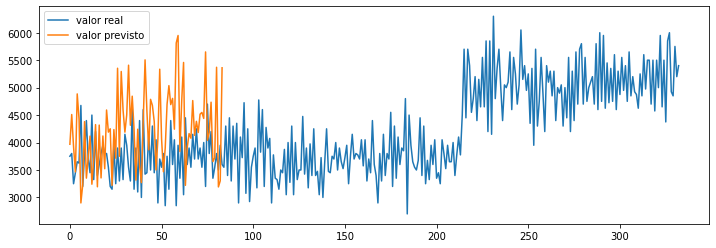

In [ ]:
# Seu código
from sklearn.neural_network import MLPRegressor

y = df2['body_mass_g']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# Definição
reg = MLPRegressor(hidden_layer_sizes=(8,16,8),random_state=1,max_iter=2000)

# Treinamento
reg.fit(X_train,y_train)
#reg.fit(X,y)

# Avaliação
y_pred = reg.predict(X_test)

score = reg.score(X, y)
print('\nScore:\n')
print(f'{score:.2f}')

fig = plt.figure(figsize=(12,4))

plt.plot(df['body_mass_g'],label='valor real')
plt.plot(y_pred,label='valor previsto')

plt.legend()
plt.show()

# Predição

Empregue os modelos anteriores para fazer a predição de um pinguim modelo da espécie `Gentoo` do sexo masculino. Os demais valores são os valores médios da coleção toda. Faça a predição tanto da ilha de origem como do peso do pinguim modelo.

In [ ]:
# Seu código
pingModelo = pd.DataFrame({"bill_length_mm":df.bill_length_mm.mean(), "bill_depth_mm":df.bill_depth_mm.mean(), "flipper_length_mm":df.flipper_length_mm.mean(), "species_Adelie":0.0, "species_Chinstrap":0.0, "species_Gentoo":1.0, "sex":1},index=[0])
pingModelo

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,sex
0,43.992793,17.164865,200.966967,0.0,0.0,1.0,1


In [ ]:
pingModelo.sum(axis=1)

0    264.124625
dtype: float64

In [ ]:
pingModelo_norm = pd.DataFrame({"bill_length_mm":X[:,0].mean(), "bill_depth_mm":X[:,1].mean(), "flipper_length_mm":X[:,2].mean(), "species_Adelie":0, "species_Chinstrap":0, "species_Gentoo":1, "sex":1},index=[0])
pingModelo_norm


,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,sex
0,0.432465,0.483912,0.490966,0,0,1,1


In [ ]:
print(clf.predict(pingModelo_norm))

print(reg.predict(pingModelo_norm))

['Biscoe']
[4991.26178267]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Experimente os Modelos Neurais

Explore diferentes configurações da rede neural para classificação, por exemplo, aumentando e diminuindo camadas e elementos das camadas.

In [ ]:
# Seu código